In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [32]:
import matplotlib.pyplot as plt


In [6]:
url = "https://en.wikipedia.org/wiki/Tiger_reserves_of_India"
response = requests.get(url)
content = response.content

In [7]:
soup = BeautifulSoup(content, 'html.parser')
soup.title


<title>Tiger reserves of India - Wikipedia</title>

In [8]:
table = soup.find('table')


In [9]:
 if table:
    si_no_list = []
    tiger_reserve_list = []
    year_of_creation_list = []
    state_list = []
    area_list = []
    population_list = []

    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        if len(columns) >= 6:
            si_no = columns[0].get_text(strip=True)
            tiger_reserve = columns[1].get_text(strip=True)
            year_of_creation = columns[2].get_text(strip=True)
            state = columns[3].get_text(strip=True)
            area = columns[4].get_text(strip=True)
            population = columns[5].get_text(strip=True)

            si_no_list.append(si_no)
            tiger_reserve_list.append(tiger_reserve)
            year_of_creation_list.append(year_of_creation)
            state_list.append(state)
            area_list.append(area)
            population_list.append(population)

    data = {
        'Si No.': si_no_list,
        'Tiger Reserve': tiger_reserve_list,
        'Year of creation': year_of_creation_list,
        'State': state_list,
        'Area': area_list,
        'Population of tigers, 2018': population_list
    }

    df = pd.DataFrame(data)
    df.head()
else:
    print("Table not found on the page.")

In [10]:
df.head()

,Si No.,Tiger Reserve,Year of creation,State,Area,"Population of tigers, 2018"
0,1,Bandipur,1973–74,Karnataka,120,868.63
1,2,Corbett,1973–74,Uttarakhand,216,1318.54
2,3,Kanha,1973–74,Madhya Pradesh,80,940
3,4,Manas,1973–74,Assam,11,500
4,5,Melghat,1973–74,Maharashtra,25,1677


In [11]:
df.tail()


,Si No.,Tiger Reserve,Year of creation,State,Area,"Population of tigers, 2018"
49,50,Kamlang,2016,Arunachal Pradesh,–,783
50,51,Srivilliputhur – Megamalai,2021,Tamil Nadu,14,1016.57
51,52,Ramgarh Vishdhari,2021,Rajasthan,35,1501.89
52,53,Guru Ghasidas National ParkandTamor Pingla Wil...,2022,Chhattisgarh,,
53,54,Ranipur Wildlife Sanctuary[11],2022,Uttar pradesh,,


In [92]:
df.rename(columns = {'Population of tigers, 2018':'Population'}, inplace = True)

In [108]:
df

,Si No.,Tiger Reserve,State,Area,Population
0,1,Bandipur,Karnataka,120,868.63
1,2,Corbett,Uttarakhand,216,1318.54
2,3,Kanha,Madhya Pradesh,80,940.00
3,4,Manas,Assam,11,500.00
4,5,Melghat,Maharashtra,25,1677.00
5,6,Palamau,Jharkhand,3,414.93
6,7,Ranthambore,Rajasthan,37,1334.00
7,8,Similipal,Odisha,99,2750.00
8,9,Sunderbans,West Bengal,96,1330.10
9,10,Periyar,Kerala,20,350.00


In [103]:
df.iloc[53,2]='Uttar Pradesh'

In [107]:
df['Population'] = df['Population'].astype(float)


In [38]:
df.drop(['Year of creation'],axis=1, inplace=True)

In [109]:
group_t=df.groupby('State')['Population'].sum().reset_index()

In [110]:
group_t

,State,Population
0,Andhra Pradesh,3728.00
1,Arunachal Pradesh,3630.18
2,Assam,1637.79
3,Bihar,898.45
4,Chhattisgarh,2372.92
5,Jharkhand,414.93
6,Karnataka,4243.00
7,Kerala,993.66
8,Madhya Pradesh,4302.20
9,Maharashtra,3980.64


In [111]:
new_df=pd.DataFrame({
    'State':group_t['State'],
    'TotPopulation':group_t['Population']
})

In [112]:
print(new_df)

                State  TotPopulation
0      Andhra Pradesh        3728.00
1   Arunachal Pradesh        3630.18
2               Assam        1637.79
3               Bihar         898.45
4        Chhattisgarh        2372.92
5           Jharkhand         414.93
6           Karnataka        4243.00
7              Kerala         993.66
8      Madhya Pradesh        4302.20
9         Maharashtra        3980.64
10            Mizoram         500.00
11             Odisha        3546.00
12          Rajasthan        4476.88
13         Tamil Nadu        4599.17
14          Telangana        4626.84
15      Uttar Pradesh        1094.09
16        Uttarakhand        2139.04
17        West Bengal        2090.10


In [113]:
new_df.dtypes

State             object
TotPopulation    float64
dtype: object

Text(0, 0.5, 'Population')

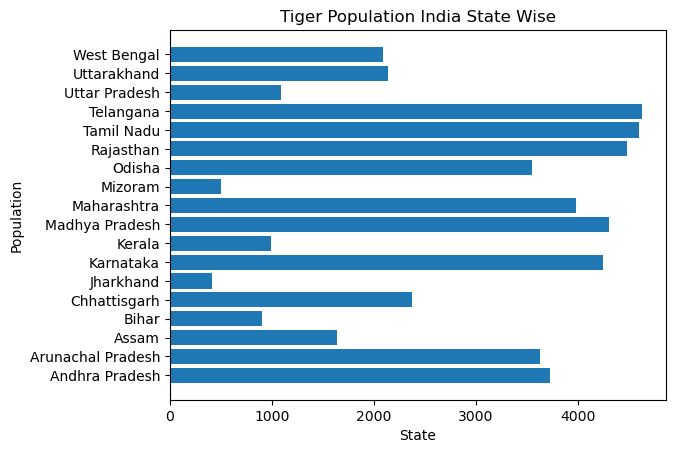

In [128]:
y=new_df["TotPopulation"]
x=new_df["State"]
plt.barh(x,y)

plt.title("Tiger Population India State Wise")
plt.xlabel("State")
plt.ylabel("Population")

([<matplotlib.patches.Wedge at 0x1cf13b3ffd0>,
 [Text(1.0690732047166613, 0.25900286283523527, 'Andhra Pradesh'),
  Text(0.8364668417449539, 0.7143691081375387, 'Arunachal Pradesh'),
  Text(0.5542752029558313, 0.9501468304363658, 'Assam'),
  Text(0.3940694972115854, 1.026990375498918, 'Bihar'),
  Text(0.17287381284718584, 1.0863308173994128, 'Chhattisgarh'),
  Text(-0.021926842050100422, 1.0997814390130933, 'Jharkhand'),
  Text(-0.3427992602207295, 1.04522182678708, 'Karnataka'),
  Text(-0.6663980670894287, 0.8751649079913303, 'Kerala'),
  Text(-0.9186882062968535, 0.6049892392522944, 'Madhya Pradesh'),
  Text(-1.0983812822150534, 0.059653657722016806, 'Maharashtra'),
  Text(-1.070676273966683, -0.25229410687691517, 'Mizoram'),
  Text(-0.9708857799125006, -0.5170887760952618, 'Odisha'),
  Text(-0.5934964272825746, -0.9261544098058487, 'Rajasthan'),
  Text(0.009652689437792206, -1.099957647178571, 'Tamil Nadu'),
  Text(0.6183848292306283, -0.909725344803258, 'Telangana'),
  Text(0.90221

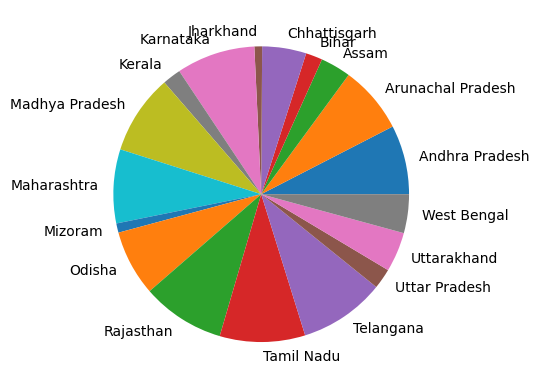

In [129]:
plt.pie(y,labels=x)